In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl
import torchvision.transforms.v2 as T
from pathlib import Path
from image_model import Image_Dataloader, Image_Model
from audio_model import Audio_Dataloader, Audio_Model
from pytorch_lightning.loggers import WandbLogger

pl.seed_everything(42)


Seed set to 42


42

# Initialize dataloaders and individual modality models

In [2]:
path_to_data = Path("../../data/")

image_dataloader = Image_Dataloader(path_to_data=path_to_data)
audio_dataloader = Audio_Dataloader(path_to_data=path_to_data)

image_model = Image_Model(num_classes=10)
audio_model = Audio_Model(num_classes=10)

# Train Image only model

In [3]:
# initialize logger and callbacks
wandb_logger = WandbLogger(project="NORA_MML_Exam", name="Image_Only_Model", log_model=True)

checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath="checkpoints", filename="image_model-{epoch:02d}-{val_loss:.2f}", monitor="val_loss", mode="min", save_top_k=1)

early_stopping_callback = pl.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")

In [7]:
# initialize trainer
trainer = pl.Trainer(max_epochs=30, accelerator="mps", devices=1, logger=wandb_logger, callbacks=[checkpoint_callback, early_stopping_callback])

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [8]:
# Train the model
trainer.fit(image_model, image_dataloader)

/Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/.venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/Exam/src/checkpoints exists and is not empty.

  | Name             | Type                      | Params | Mode 
-----------------------------------------------------------------------
0 | loss             | CrossEntropyLoss          | 0      | train
1 | accuracy         | MulticlassAccuracy        | 0      | train
2 | confusion_matrix | MulticlassConfusionMatrix | 0      | train
3 | model            | Sequential                | 225 K  | train
-----------------------------------------------------------------------
225 K     Trainable params
0         Non-trainable params
225 K     Total params
0.900     Total estimated model params size (MB)
16        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [9]:
# Test the model
image_model = Image_Model.load_from_checkpoint(checkpoint_callback.best_model_path)

trainer.test(image_model, image_dataloader)

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.882915198802948
        test_loss           0.5318756103515625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.5318756103515625, 'test_accuracy': 0.882915198802948}]

# Train Audio only model

In [3]:
# initialize logger and callbacks
wandb_logger = WandbLogger(project="NORA_MML_Exam", name="Audio_Only_Model", log_model=True)

checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath="checkpoints", filename="audio_model-{epoch:02d}-{val_loss:.2f}", monitor="val_loss", mode="min", save_top_k=1)

early_stopping_callback = pl.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")

In [4]:
# initialize trainer
trainer = pl.Trainer(max_epochs=15, accelerator="mps", devices=1, logger=wandb_logger, callbacks=[checkpoint_callback, early_stopping_callback])

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
# Train the model
trainer.fit(audio_model, audio_dataloader)

wandb: Currently logged in as: hzavadil98 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/.venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/Exam/src/checkpoints exists and is not empty.

  | Name             | Type                      | Params | Mode 
-----------------------------------------------------------------------
0 | loss             | CrossEntropyLoss          | 0      | train
1 | accuracy         | MulticlassAccuracy        | 0      | train
2 | confusion_matrix | MulticlassConfusionMatrix | 0      | train
3 | featurizer       | Sequential                | 241 K  | train
4 | classifier       | Sequential                | 4.5 K  | train
-----------------------------------------------------------------------
246 K     Trainable params
0         Non-trainable params
246 K     Total params
0.985     Total estimated model params size (MB)
39        Modules in train m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Reload the audio_model module after fixing the dimension mismatch
import importlib
import sys

# Remove the audio_model from cache to ensure fresh import
if 'audio_model' in sys.modules:
    del sys.modules['audio_model']

# Import fresh version
from audio_model import Audio_Model, Audio_Dataloader
importlib.reload(sys.modules['audio_model'])

# Recreate the audio model with the fixed architecture
audio_model = Audio_Model(num_classes=10)
print("Audio model reloaded successfully with fixed architecture")

In [ ]:
# Test the model
audio_model = Audio_Model.load_from_checkpoint(checkpoint_callback.best_model_path)

trainer.test(audio_model, audio_dataloader)

/Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   test_accuracy_epoch      0.8641406297683716
     test_loss_epoch        0.44109928607940674
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss_epoch': 0.44109928607940674,
  'test_accuracy_epoch': 0.8641406297683716}]

In [13]:
tr_dat = audio_dataloader.train_dataloader()

In [14]:
batch = next(iter(tr_dat))

In [15]:
batch[0].shape, batch[1].shape

(torch.Size([32, 1, 8000]), torch.Size([32]))

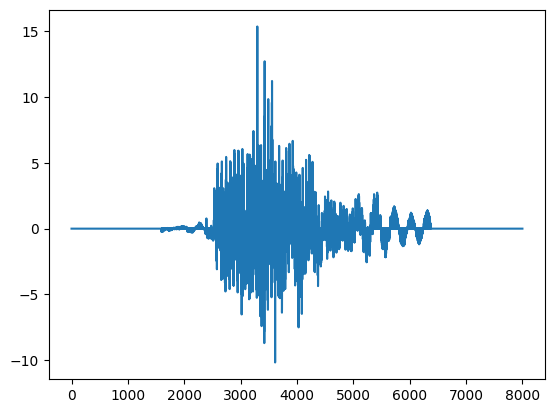

In [12]:
plt.plot(batch[0][0].numpy().T)